<a href="https://colab.research.google.com/github/A-Malik31/EmotionDetection/blob/main/Steam_Clasificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Load Dataset

In [14]:
file_path = '/content/steam.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

In [15]:
file_path = '/content/steam_description_data.csv'  # Replace with the correct path
data2 = pd.read_csv(file_path)

Display Dataset

In [16]:
print(data.head())
print(data.info())

   appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat

In [17]:
print(data2.head())
print(data2.info())

   steam_appid                               detailed_description  \
0           10  Play the world's number 1 online action game. ...   
1           20  One of the most popular online action games of...   
2           30  Enlist in an intense brand of Axis vs. Allied ...   
3           40  Enjoy fast-paced multiplayer gaming with Death...   
4           50  Return to the Black Mesa Research Facility as ...   

                                      about_the_game  \
0  Play the world's number 1 online action game. ...   
1  One of the most popular online action games of...   
2  Enlist in an intense brand of Axis vs. Allied ...   
3  Enjoy fast-paced multiplayer gaming with Death...   
4  Return to the Black Mesa Research Facility as ...   

                                   short_description  
0  Play the world's number 1 online action game. ...  
1  One of the most popular online action games of...  
2  Enlist in an intense brand of Axis vs. Allied ...  
3  Enjoy fast-paced multipla

In [18]:
data.duplicated().sum()

0

In [19]:
data2.duplicated().sum()

0

In [20]:
data.isnull().sum()

,0
appid,0
name,0
release_date,0
english,0
developer,1
publisher,14
platforms,0
required_age,0
categories,0
genres,0


In [21]:
data = data[data['publisher'].notnull()]

In [22]:
data.isnull().sum()

,0
appid,0
name,0
release_date,0
english,0
developer,0
publisher,0
platforms,0
required_age,0
categories,0
genres,0


In [24]:
# Create genre column from list of genres
data['genre'] = data['genres'].apply(lambda x: x.split(';')[0])

In [26]:
data.head(1)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,genre
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,Action


In [27]:
steam_genres = data['genre'].value_counts()
steam_genres.head(20)

,count
genre,
Action,11205
Adventure,5254
Casual,4371
Indie,2622
Violent,708
Simulation,630
Strategy,532
RPG,407
Free to Play,395


In [28]:
(data["genre"].value_counts()).shape # total no of genres

(26,)

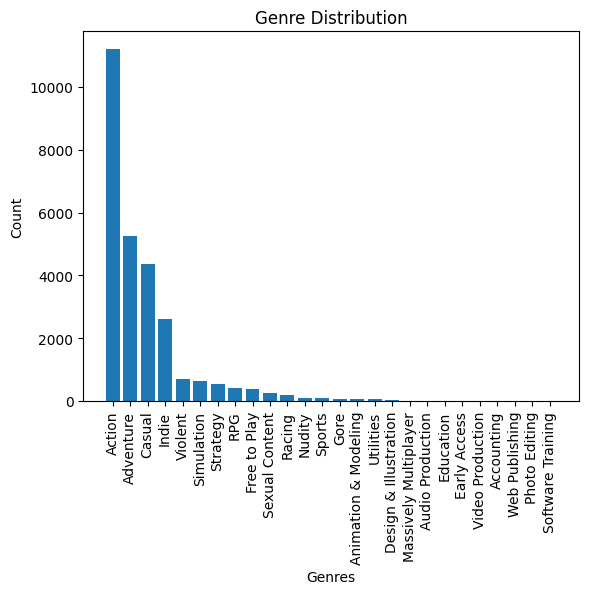

In [29]:
import matplotlib.pyplot as plt
genre_counts  = data['genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Genre Distribution")
plt.show()

                    genre  positive_ratings
0              Accounting          7.000000
1                  Action       1661.722178
2               Adventure        441.714884
3    Animation & Modeling       1341.863636
4        Audio Production         47.750000
5                  Casual        208.231755
6   Design & Illustration        298.107143
7            Early Access         43.444444
8               Education         37.428571
9            Free to Play        791.263291
10                   Gore        127.000000
11                  Indie        728.763158
12  Massively Multiplayer       3067.000000
13                 Nudity        877.633929
14          Photo Editing         17.000000
15                    RPG       2611.759214
16                 Racing        988.548223
17         Sexual Content        571.975510
18             Simulation        845.717460
19      Software Training        138.000000
20                 Sports        180.180723
21               Strategy       

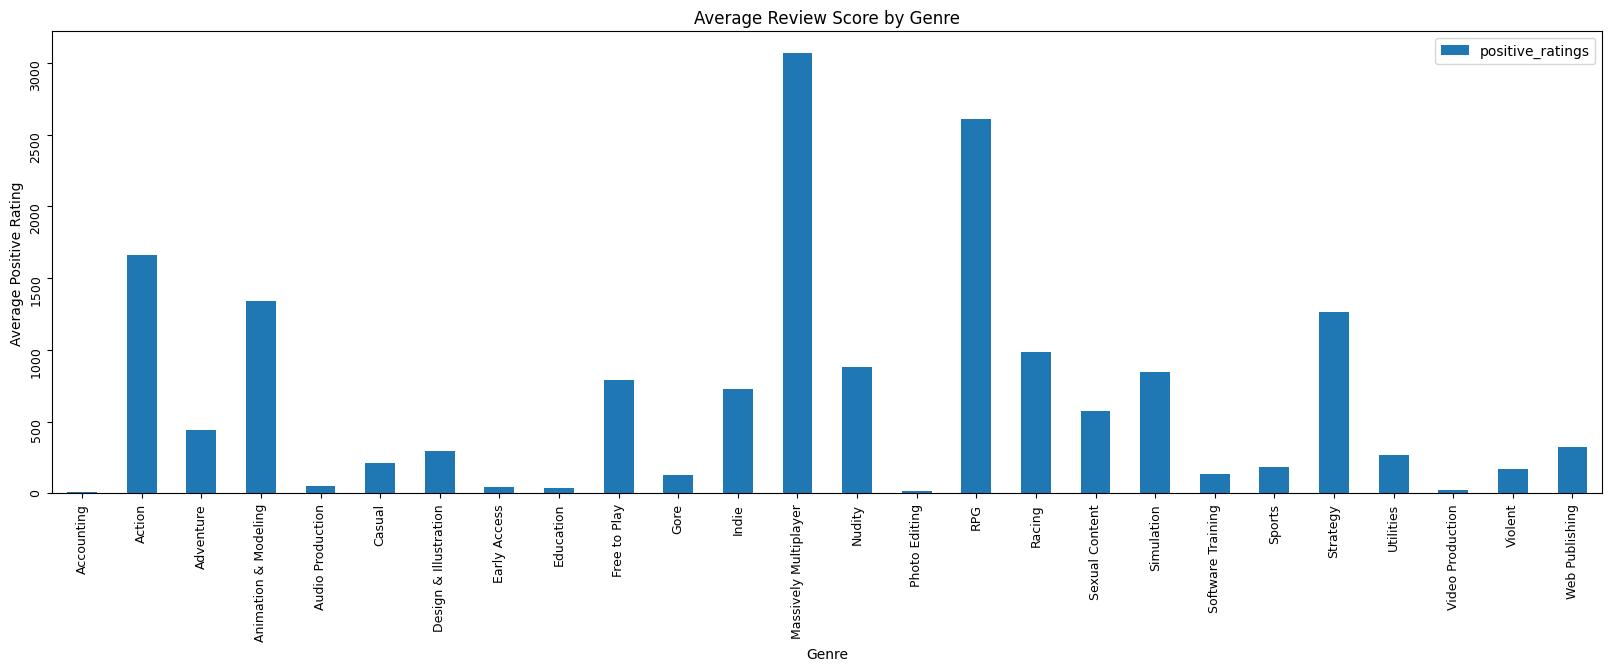

In [30]:
# Calculate average review score for each genre
#genre_scores = data.groupby('genre')['positive_ratings'].mean().reset_index()
#print(genre_scores)

# Adjust figure size
#plt.figure(figsize=(20, 6))

# Create axes explicitly
#ax = plt.gca()

# Bar chart of average review score by genre
#genre_scores.plot.bar(x='genre', y='positive_ratings', rot=0, title="Average Review Score by Genre", ax=ax)

#ax.tick_params(rotation=90, labelsize=9)
#ax.set_xlabel("Genre")
#ax.set_ylabel("Average Positive Rating")

# Show the plot
#plt.show()

DATA CLEANING

In [31]:
data['steamspy_tags'].value_counts()

,count
steamspy_tags,
Action;Indie;Casual,845
Action;Adventure;Indie,714
Early Access;Action;Indie,507
Adventure;Indie;Casual,441
Indie;Casual,377
...,...
Spelling;Casual;Typing,1
Action;Adventure;Warhammer 40K,1
Anime;RPG;Cute,1


In [32]:
data.drop("steamspy_tags",axis=1,inplace=True)

In [33]:
data['categories'].value_counts()

,count
categories,
Single-player,6103
Single-player;Steam Achievements,2334
Single-player;Steam Achievements;Steam Trading Cards,846
Single-player;Partial Controller Support,804
Single-player;Steam Trading Cards,792
...,...
Single-player;Multi-player;Online Multi-Player;Co-op;Online Co-op;Steam Achievements;Steam Trading Cards;In-App Purchases;Partial Controller Support,1
Single-player;Steam Achievements;Steam Trading Cards;Captions available;Partial Controller Support;Commentary available,1
Single-player;Steam Achievements;Full controller support;Steam Trading Cards;VR Support;Steam Cloud;Steam Leaderboards,1


In [34]:
data.drop("categories",axis=1,inplace=True)

In [35]:
data['required_age'].value_counts()

,count
required_age,
0,26465
18,308
16,192
12,73
7,12
3,11


In [36]:
data.drop("required_age",axis=1,inplace=True)

In [37]:
data['achievements'].value_counts()

,count
achievements,
0,11854
10,678
12,618
20,574
15,490
...,...
5394,1
678,1
2130,1


In [38]:
data.drop("achievements",axis=1,inplace=True)

In [39]:
data['negative_ratings'].value_counts()

,count
negative_ratings,
0,2906
1,2746
2,1907
3,1503
4,1180
...,...
53709,1
21816,1
1831,1


In [40]:
data.drop("negative_ratings",axis=1,inplace=True)

In [41]:
data['average_playtime'].value_counts()

,count
average_playtime,
0,20896
1,155
3,73
2,58
9,56
...,...
1678,1
623,1
21247,1


In [42]:
data.drop("average_playtime",axis=1,inplace=True)

In [43]:
data['median_playtime'].value_counts()

,count
median_playtime,
0,20896
1,154
3,72
2,52
9,48
...,...
2379,1
2478,1
1052,1


In [44]:
data.drop("median_playtime",axis=1,inplace=True)

In [45]:
data['english'].value_counts()

,count
english,
1,26550
0,511


In [46]:
data.drop("english",axis=1,inplace=True)

In [47]:
data.head(1)

,appid,name,release_date,developer,publisher,platforms,genres,positive_ratings,owners,price,genre
0,10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Action,124534,10000000-20000000,7.19,Action


Merge Data

In [48]:
data2['appid'] = data2['steam_appid']

In [49]:
data2.drop("steam_appid",axis=1,inplace=True)

In [50]:
df = pd.merge(data, data2, how = 'inner', on='appid')

In [51]:
df['owners'].value_counts()

,count
owners,
0-20000,18586
20000-50000,3057
50000-100000,1693
100000-200000,1386
200000-500000,1272
500000-1000000,513
1000000-2000000,288
2000000-5000000,193
5000000-10000000,46


Filtering

In [52]:
owners_interest = ["500000-1000000", "1000000-2000000", "2000000-5000000", "5000000-10000000",
                  "10000000-20000000", "20000000-50000000", "50000000-100000000", "100000000-200000000	"]
df_filtered = df[df["owners"].isin(owners_interest)]

In [53]:
top_genres = ["Action", "Adventure", "Casual", "Indie", "Violent", "Simulation", "Strategy",
              "RPG", "Free to Play", "Sexual Content", "Racing", "Nudity", "Sports", "Gore"]
df_filtered1 = df_filtered[df_filtered["genre"].isin(top_genres)]

In [54]:
df_filtered1.head()

,appid,name,release_date,developer,publisher,platforms,genres,positive_ratings,owners,price,genre,detailed_description,about_the_game,short_description
0,10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Action,124534,10000000-20000000,7.19,Action,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,Action,3318,5000000-10000000,3.99,Action,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,Action,3416,5000000-10000000,3.99,Action,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,Action,1273,5000000-10000000,3.99,Action,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,Action,5250,5000000-10000000,3.99,Action,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


Elbow

In [55]:
!pip install textblob

In [56]:
import nltk
nltk.download('punkt_tab')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [57]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [58]:
!nltk.download('stopwords')
!nltk.download('punkt')

/bin/bash: -c: line 1: syntax error near unexpected token `'stopwords''
/bin/bash: -c: line 1: `nltk.download('stopwords')'
/bin/bash: -c: line 1: syntax error near unexpected token `'punkt''
/bin/bash: -c: line 1: `nltk.download('punkt')'


In [59]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Apply cleaning function
df_filtered1['clean_plot'] = df_filtered1['detailed_description'].dropna().apply(clean_text)

<ipython-input-59-8f7118c63957>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['clean_plot'] = df_filtered1['detailed_description'].dropna().apply(clean_text)


In [60]:
def get_polarity_scores(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
sentiment_scores = df_filtered1['clean_plot'].apply(lambda x: pd.Series(get_polarity_scores(x)))
df_filtered1[['polarity', 'subjectivity']] = sentiment_scores

<ipython-input-60-e514e9d2bf3b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1[['polarity', 'subjectivity']] = sentiment_scores
<ipython-input-60-e514e9d2bf3b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1[['polarity', 'subjectivity']] = sentiment_scores


In [61]:
features = df_filtered1[['positive_ratings','polarity', 'subjectivity']].dropna()

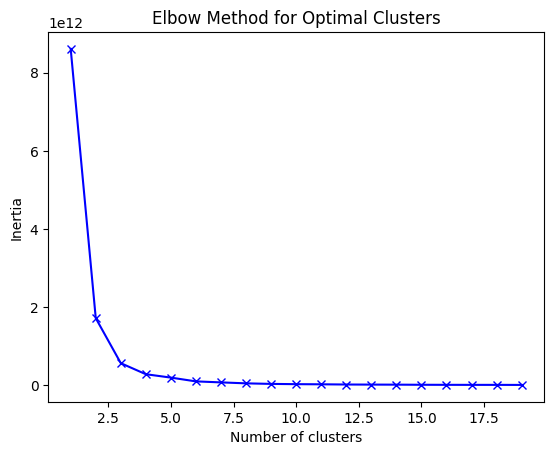

In [62]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # Import KMeans
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 20)  # Adjust the range based on your data
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df_filtered1['cluster'] = kmeans.fit_predict(features)

<ipython-input-63-e31a83f10f79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['cluster'] = kmeans.fit_predict(features)


In [64]:
!pip install wordcloud

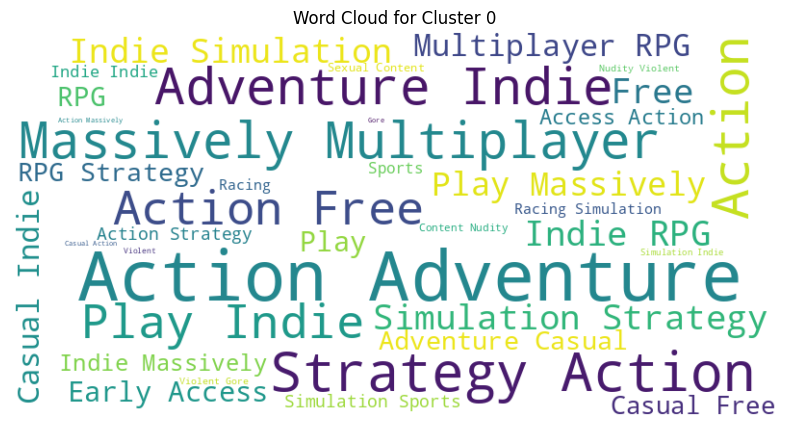

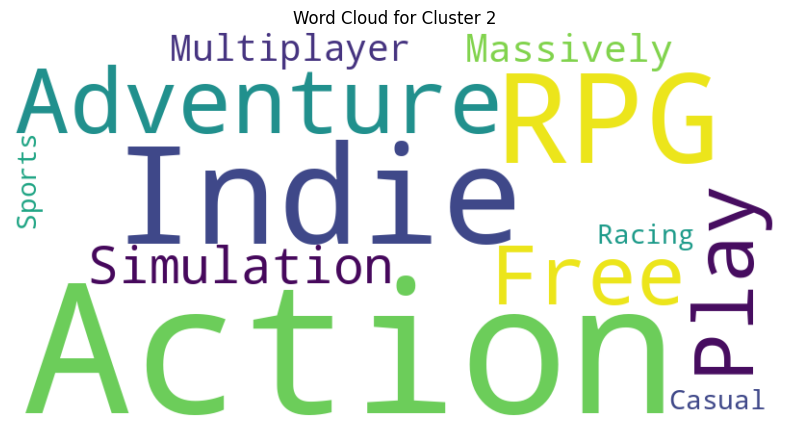

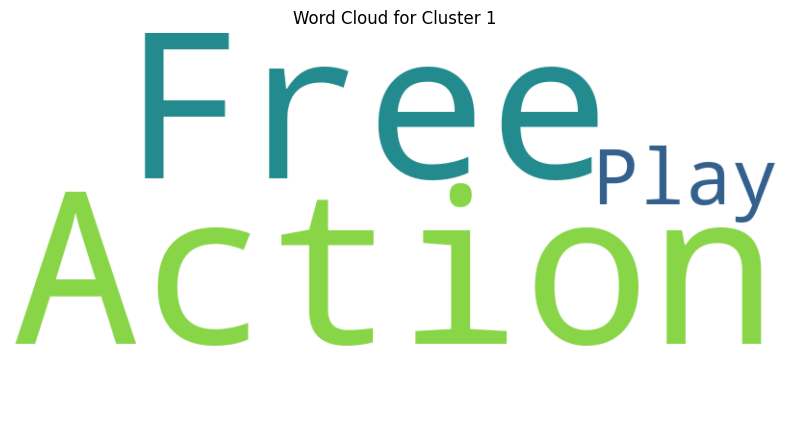

In [65]:
from wordcloud import WordCloud
def create_word_cloud(cluster_data, cluster_num):
    text = ' '.join(cluster_data['genres'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

# Create and display word clouds for each cluster
for cluster_num in df_filtered1['cluster'].unique():
    cluster_data = df_filtered1[df_filtered1['cluster'] == cluster_num]
    create_word_cloud(cluster_data, cluster_num)

Cluster 0 =  Happy/Joy/Love
Cluster 1 = Sad/Fear/Anger (diisi dengan game yang tidak berat dan mudah)
Cluster 2 = Neutral/Disgust/Surprise (karena didominasi oleh game genre yang banyak diminati)
> Tambahkan blockquote



In [66]:
cluster=df_filtered1.groupby(by=df_filtered1['cluster'])

In [67]:
df_filtered1=cluster.apply(lambda x: x.sort_values(["positive_ratings"],ascending=False))
df_filtered1.reset_index(level=0, inplace=True,drop=True)

<ipython-input-67-b252ce5f1648>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered1=cluster.apply(lambda x: x.sort_values(["positive_ratings"],ascending=False))


In [68]:
df_filtered1.head()

,appid,name,release_date,developer,publisher,platforms,genres,positive_ratings,owners,price,genre,detailed_description,about_the_game,short_description,clean_plot,polarity,subjectivity,cluster
4710,346110,ARK: Survival Evolved,2017-08-27,Studio Wildcard;Instinct Games;Efecto Studios;...,Studio Wildcard,windows;mac;linux,Action;Adventure;Indie;Massively Multiplayer;RPG,145035,5000000-10000000,44.99,Action,"As a man or woman stranded naked, freezing and...","As a man or woman stranded naked, freezing and...","Stranded on the shores of a mysterious island,...",man woman stranded naked freezing starving sho...,0.087867,0.470927,0
903,49520,Borderlands 2,2012-09-20,Gearbox Software;Aspyr (Mac);Aspyr (Linux),2K;Aspyr (Mac);Aspyr (Linux),windows;mac;linux,Action;RPG,144595,5000000-10000000,19.99,Action,A new era of shoot and loot is about to begin....,A new era of shoot and loot is about to begin....,The Ultimate Vault Hunter’s Upgrade lets you g...,new era shoot loot begin play one four new vau...,0.091678,0.571124,0
6043,381210,Dead by Daylight,2016-06-14,Behaviour Digital Inc.,Behaviour Digital Inc.,windows,Action,140721,5000000-10000000,14.99,Action,<h1>Digital Deluxe Edition</h1><p>The <strong>...,"<img src=""https://steamcdn-a.akamaihd.net/stea...",Dead by Daylight is a multiplayer (4vs1) horro...,h digital deluxe edition h p strong deluxe edi...,0.125859,0.582917,0
23,620,Portal 2,2011-04-18,Valve,Valve,windows;mac;linux,Action;Adventure,138220,10000000-20000000,7.19,Action,Portal 2 draws from the award-winning formula ...,Portal 2 draws from the award-winning formula ...,The &quot;Perpetual Testing Initiative&quot; h...,portal draws award winning formula innovative ...,0.196822,0.545172,0
222,8930,Sid Meier's Civilization® V,2010-09-23,Firaxis Games;Aspyr (Mac);Aspyr (Linux),2K;Aspyr (Mac);Aspyr (Linux),windows;mac;linux,Strategy,129030,5000000-10000000,19.99,Strategy,The Flagship Turn-Based Strategy Game Returns<...,The Flagship Turn-Based Strategy Game Returns<...,"Create, discover, and download new player-crea...",flagship turn based strategy game returns br b...,0.211534,0.509485,0


Recommendations based on classification results

In [69]:
def recommend_games(cluster_value):
    filtered_games= df_filtered1[df_filtered1['cluster'] == cluster_value]
    top_games = filtered_games.head(10)  # Get the first 10 movies by index
    return top_games[['appid', 'name', 'price']]

In [70]:
recommended_games = recommend_games(2)
print(recommended_games)

        appid                             name  price
19        440                  Team Fortress 2   0.00
12827  578080    PLAYERUNKNOWN'S BATTLEGROUNDS  26.99
121      4000                      Garry's Mod   6.99
2478   271590               Grand Theft Auto V  24.99
1467   218620                         PAYDAY 2   7.49
3362   304930                         Unturned   0.00
1120   105600                         Terraria   6.99
21        550                    Left 4 Dead 2   7.19
5232   359550  Tom Clancy's Rainbow Six® Siege  16.99
2031   252950                   Rocket League®  14.99


Save with PKL format

In [71]:
import pickle
file = open('dataset.pkl','wb')
pickle.dump(df_filtered1,file)